In [1]:
import preprocessing as pp
import detection
import measurement

import os
import matplotlib.pyplot as plt
import cv2
import numpy as np
import math


### GLOBAL FLAGS ###
DO_MEAS = False

# 0. Helper functions

In [2]:
def draw_lines_circles(img, lines, circles, thickness=2):

    base_n_shapes = cv2.cvtColor(img.copy(), cv2.COLOR_GRAY2RGB)

    # Draw lines
    if lines:   # if lines is not empty
        for (x1, y1, x2, y2) in lines:
            cv2.line(base_n_shapes, (x1, y1), (x2, y2), (0, 255, 0), thickness)
        for (x1, y1, x2, y2) in lines:
            cv2.circle(base_n_shapes, (x1, y1), 2, (0, 0, 255), thickness)
            cv2.circle(base_n_shapes, (x2, y2), 2, (0, 0, 255), thickness)

    # Draw circles
    print(circles)
    if circles:     # if circles is not empty
        for (x, y, r) in circles:
            cv2.circle(base_n_shapes, (x, y), r, (0, 255, 0), thickness)
            cv2.circle(base_n_shapes, (x, y), 2, (0, 0, 255), thickness)

    return base_n_shapes



# 1. Define version of functions to use: get_edges(), find_lines(), find_circles()

In [3]:
f_get_edges = pp.get_edges
# f_get_edges = pp.get_edges_2

f_find_lines = detection.find_lines_HT

f_find_circles = detection.find_circles_HT
# f_find_circles = detection.find_circles

# 2. Specify, load, & display test images to use

Base path: c:\Users\jtyzhang\Desktop\jtyzhang\EECS442\EECS442_Final_Project


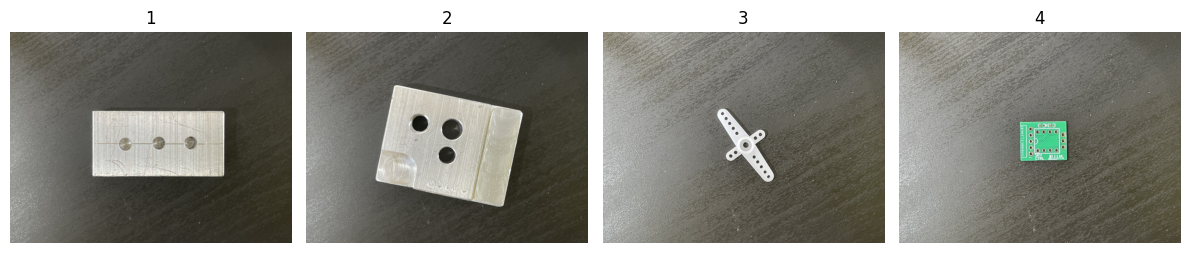

In [4]:
base_path = os.getcwd()
print("Base path:", base_path)
files = []

# parts_path = os.path.join(base_path, "data", "physical parts")
# files.append( os.path.join(parts_path, "Basic II base part.jpg") )
# files.append( os.path.join(parts_path, "mill part 2.jpeg") )
# files.append( os.path.join(parts_path, "servo mount 1.jpeg") )
# files.append( os.path.join(parts_path, "small PCB 2.jpeg") )

# parts_path = os.path.join(base_path, "data", "physical parts", "52mm 7in")
# img11 = os.path.join(parts_path, "Basic II base part 2.jpeg")
# img22 = os.path.join(parts_path, "mill part 2.jpeg")
# img33 = os.path.join(parts_path, "servo mount 1.jpeg")
# img44 = os.path.join(parts_path, "small PCB 2.jpeg")


parts_path = os.path.join(base_path, "data", "physical parts", "52mm 7in blk")
# files.append( os.path.join(parts_path, "Basic II base part 1 thk0.50.jpeg") )
files.append( os.path.join(parts_path, "Basic II base part 2 thk0.50.jpeg") )
files.append( os.path.join(parts_path, "mill part 1 thk0.50.jpeg") )
files.append( os.path.join(parts_path, "servo mount 1 thk0.20.jpeg") )
files.append( os.path.join(parts_path, "small PCB 2 thk0.06.jpeg") )

titles = [str(i) for i in range(1, len(files)+1)]

imgs = detection.show_images_from_files(files, titles)

# 3. Pass each image through f_get_edges(); extract result & intermediate images

In [5]:
img_results = []
for img in imgs:
    # find edges on original image
    edges, interms = f_get_edges(img, return_interm=True)

    # find features & overlay them on edge map
    # we can perform measurement on the following outputs 
    lines = f_find_lines(edges)
    circles = f_find_circles(edges)
    # circles = f_find_circles(img, return_type="circles")
    img_lines = draw_lines_circles(edges, lines, [])
    img_circles = draw_lines_circles(edges, [], circles)
    # features = draw_lines_circles(edges, lines, circles)


    # doing measurement here
    if DO_MEAS:
        measured_lines = measurement.measure_line(lines, conversion_ratio=1.0)
        measured_circles = measurement.measure_circle(circles, conversion_ratio=1.0)


    # organize results
    result = [img]
    result.extend(interms)
    result.append(edges)
    result.append(img_lines)
    result.append(img_circles)
    # result.append(features)
    
    # store results of this instance
    img_results.append(result)

    # display measurement results
    if DO_MEAS:
        out = measurement.draw_measurements(img, measured_lines, measured_circles)
        plt.figure()
        plt.imshow(out)

[]
[(2078, 1586, 30), (2075, 1595, 28)]
[]
[(2390, 2358, 32), (2385, 2368, 33), (2389, 2351, 31), (2390, 2367, 29), (2380, 2380, 30), (2333, 2410, 27)]
[]
[(1899, 1725, 38), (1826, 1775, 37), (2179, 1520, 37), (2253, 1468, 37), (1756, 1240, 36), (1913, 1449, 36), (1858, 1384, 36), (1865, 1377, 36), (1816, 1308, 36), (1808, 1310, 36), (2166, 1789, 35), (2159, 1791, 35), (2211, 1859, 35), (2266, 1928, 34), (1713, 1167, 35), (2315, 2007, 34), (2368, 2069, 33), (2161, 1798, 35), (2247, 1474, 36), (2044, 1603, 37), (1890, 1725, 36), (2058, 1619, 38), (2365, 2077, 31), (2249, 1448, 34), (2033, 1604, 38), (2057, 1628, 38), (2052, 1609, 36), (2043, 1641, 35), (2262, 1939, 31), (2272, 1453, 33), (2029, 1634, 37), (2051, 1602, 35), (2028, 1609, 37), (2217, 1865, 38), (2033, 1631, 37), (2240, 1449, 35), (1909, 1456, 33), (1920, 1455, 39), (1805, 1790, 33), (1871, 1383, 32), (2042, 1618, 25), (1702, 1171, 31), (1713, 1177, 32), (1753, 1247, 30), (1818, 1315, 32), (1761, 1251, 30), (2211, 1851, 30)

# 4. Plot all images in organized format
images (or different objects) listed along rows;
intermediate results of each object listed along columns

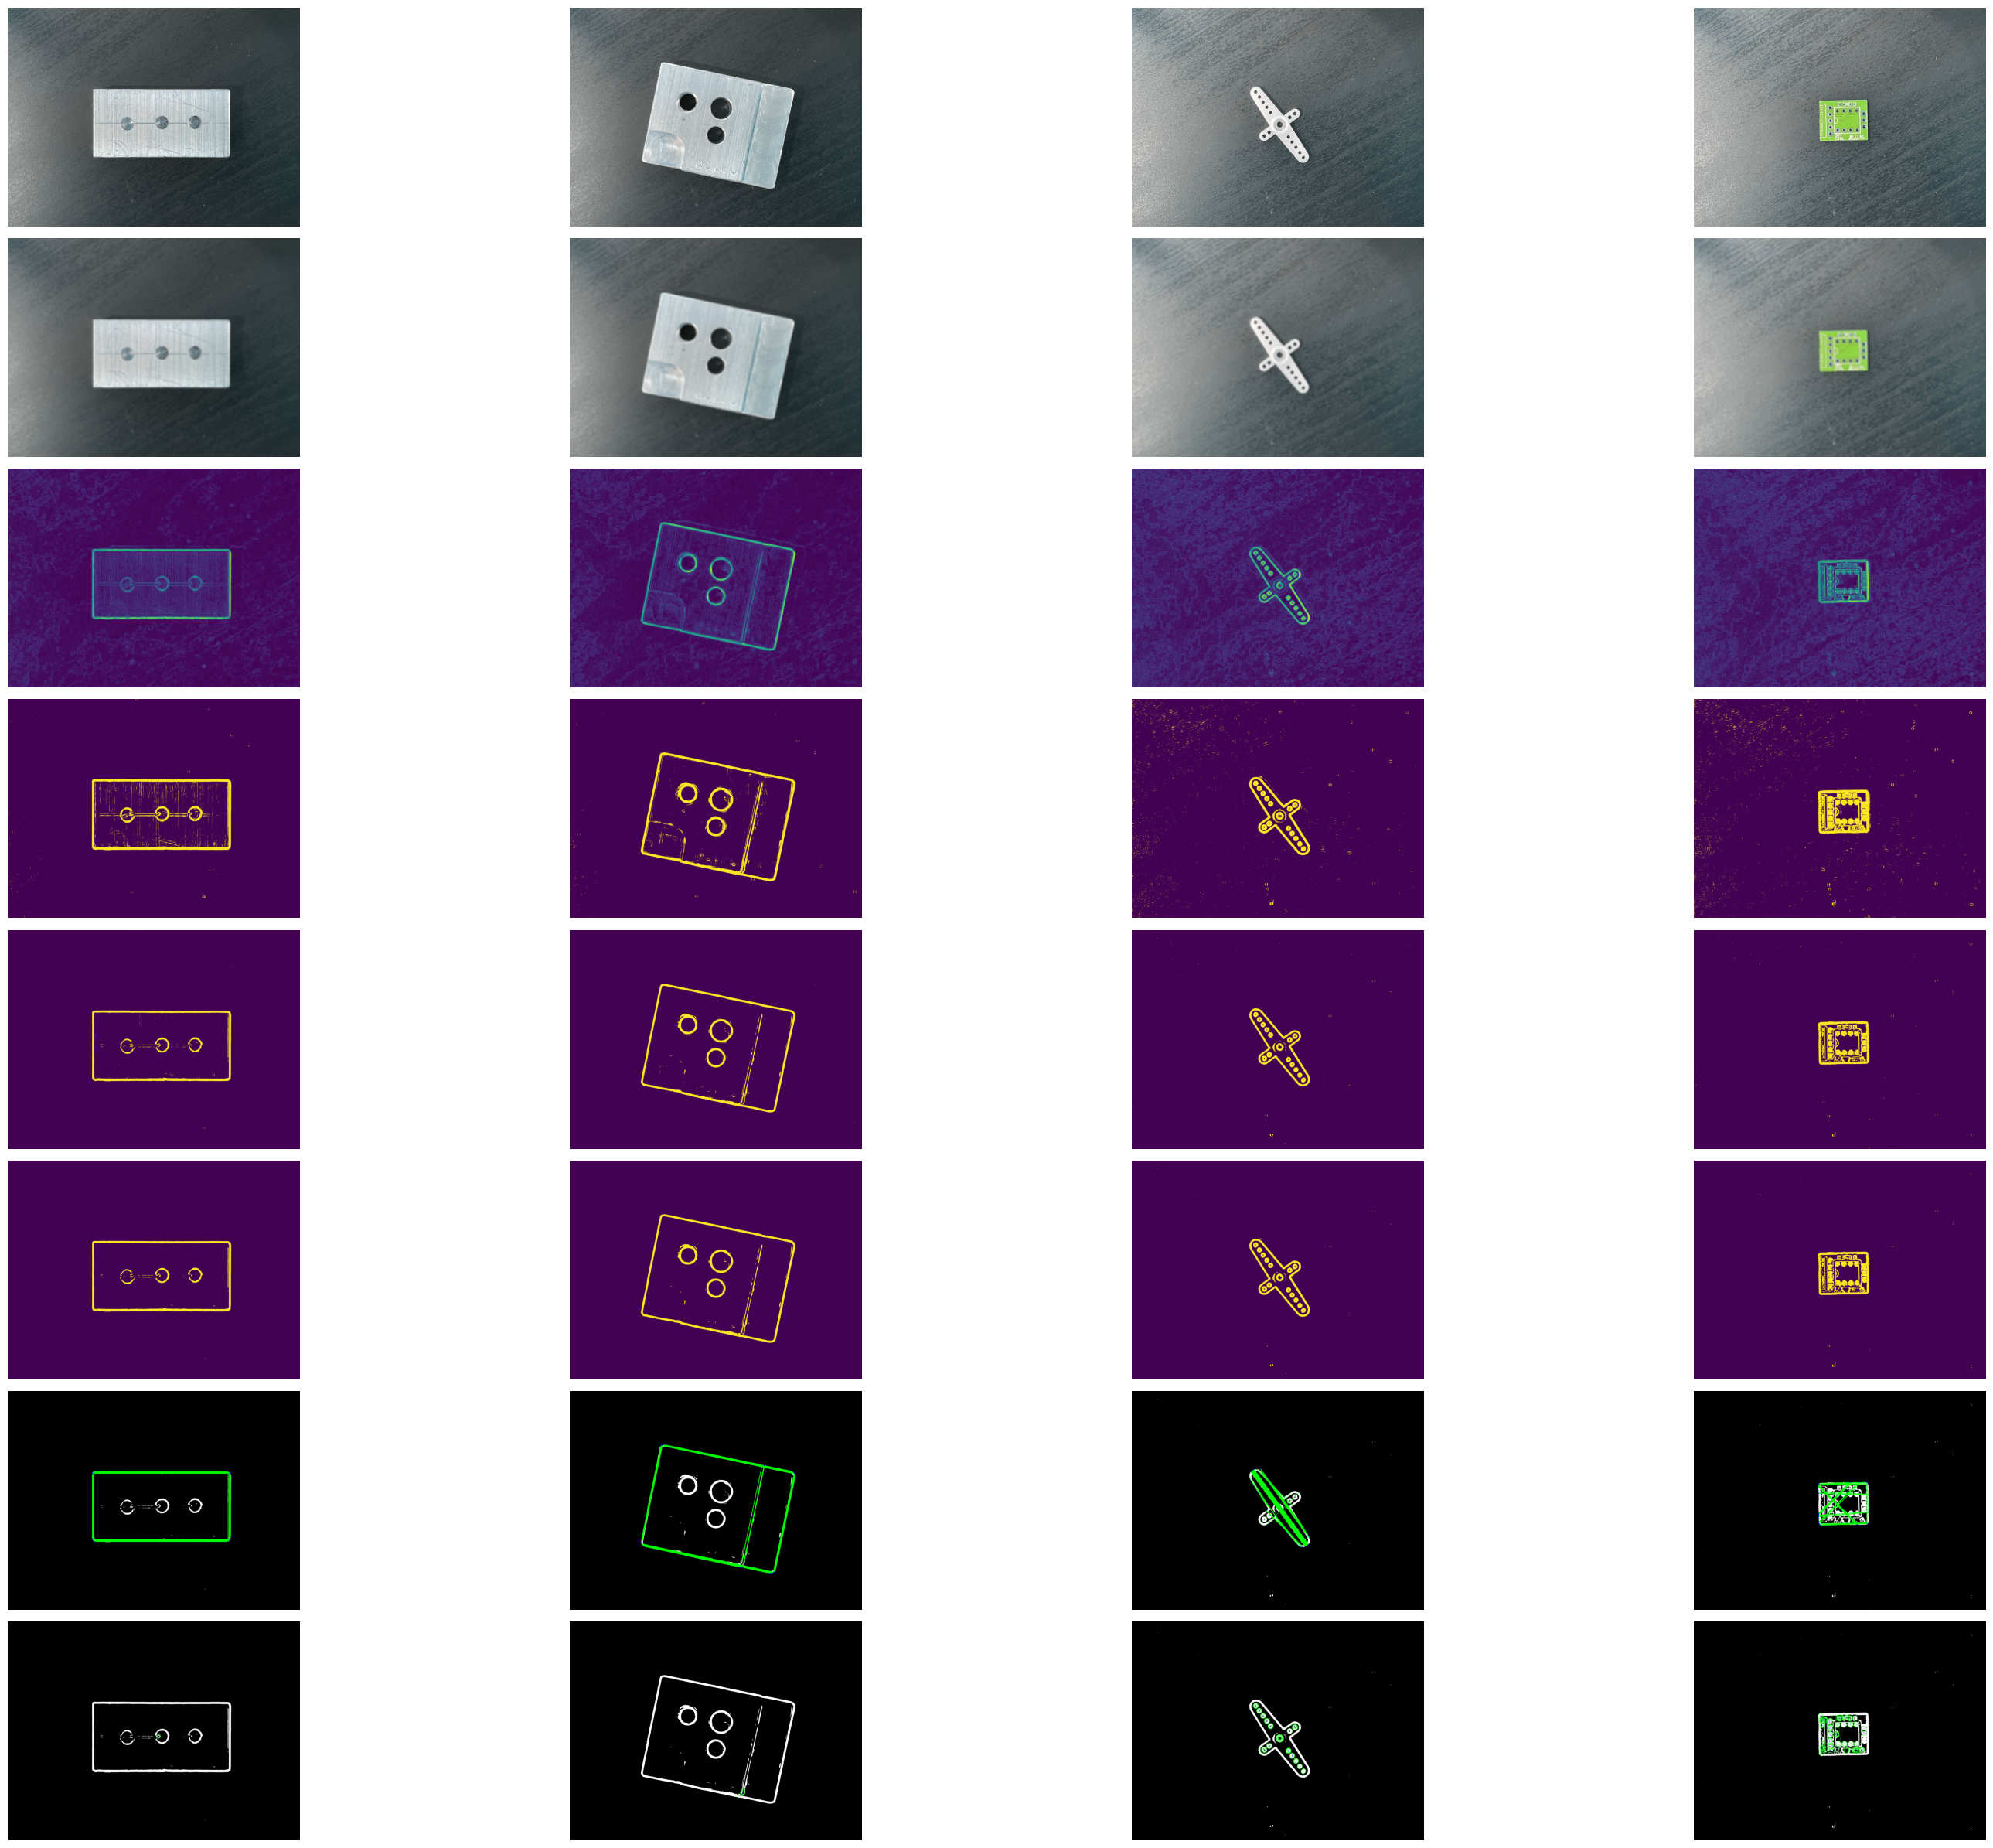

In [6]:
figsize = (32,24)    # physical part images taken from iphone should be of shape 4:3
cols = len(img_results)     # plot objects along cols
rows = len(img_results[0])  # plot steps along rows

plt.figure(figsize=figsize)
i = 1
for r in range(rows):
    for obj in img_results:
        plt.subplot(rows, cols, i)
        rst = obj[r]
        plt.imshow(rst)
        plt.axis('off')
        i += 1
plt.tight_layout()
plt.show()


# 5. Filtration: 12/2/2025

## Define filtration methods

In [7]:
from sklearn.cluster import DBSCAN

def filter_lines(lines, eps_pos=10.0, eps_len=20.0, eps_angle=0.1, min_samples=2):
    if not lines:
        return []

    cpfs = []
    for (x1, y1, x2, y2) in lines:
        x0 = (x1 + x2) / 2.0
        y0 = (y1 + y2) / 2.0
        L  = math.hypot(x2 - x1, y2 - y1)
        t  = math.atan2(y2 - y1, x2 - x1)
        if t < 0:
            t += math.pi
        cpfs.append((x0, y0, L, t))

    cpfs = np.array(cpfs, dtype=float)

    # Scale features for DBSCAN
    X = np.empty_like(cpfs)
    X[:, 0] = cpfs[:, 0] / eps_pos
    X[:, 1] = cpfs[:, 1] / eps_pos
    X[:, 2] = cpfs[:, 2] / eps_len
    X[:, 3] = cpfs[:, 3] / eps_angle

    db = DBSCAN(eps=3.0, min_samples=min_samples)
    labels = db.fit_predict(X)

    filtered = []
    unique_labels = set(labels)
    for lbl in unique_labels:
        if lbl == -1:
            continue

        cluster_cpfs = cpfs[labels == lbl]
        if cluster_cpfs.size == 0:
            continue

        x0 = np.median(cluster_cpfs[:, 0])
        y0 = np.median(cluster_cpfs[:, 1])
        L  = np.max(cluster_cpfs[:, 2])
        t  = np.median(cluster_cpfs[:, 3])

        # Convert back to (x1, y1, x2, y2)
        dx = (L / 2.0) * math.cos(t)
        dy = (L / 2.0) * math.sin(t)

        x1 = int(round(x0 - dx))
        y1 = int(round(y0 - dy))
        x2 = int(round(x0 + dx))
        y2 = int(round(y0 + dy))

        filtered.append((x1, y1, x2, y2))

    return filtered


In [8]:
# PROBLEM TO ADDRESS: Get rid of small circles - They get high scores when they exist inside the gradient entirely

def filter_circles(edges, circles, height, width,
                   radial_tolerance=1, # Assumed thickness tolerance of an edge 
                   grad_mag_thresh=6.0, # Magnitude threshold for gradient difference
                   angle_cos_thresh=0.7, # Threshold from orthogonal to test 
                   min_strength=0.2, # Minimum required strength to allow a cluster (0-1)
                   num_samples=180): # Num point samples drawn along the cricle

    canvas = np.zeros((height, width), dtype=np.uint8)

    # Normalize circles to a Python list of tuples
    if circles is None:
        circles = []
    elif isinstance(circles, np.ndarray):
        circles = circles.tolist()

    if hasattr(circles, '__len__') and len(circles) == 0:
        return [], canvas

    # Edge Gradients
    gx = cv2.Sobel(edges, cv2.CV_32F, 1, 0, ksize=3)
    gy = cv2.Sobel(edges, cv2.CV_32F, 0, 1, ksize=3)

    circles = [(int(x), int(y), int(r)) for (x, y, r) in circles if r > 0]
    n = len(circles)
    if n == 0:
        return [], canvas

    # Group circles by containment w/ union find (borrowed implementation)

    parent = list(range(n))

    def find(i):
        while parent[i] != i:
            parent[i] = parent[parent[i]]
            i = parent[i]
        return i

    def union(i, j):
        ri, rj = find(i), find(j)
        if ri != rj:
            parent[rj] = ri

    def contains(ci, cj):
        xi, yi, ri = ci
        xj, yj, rj = cj
        dx = xj - xi
        dy = yj - yi
        d = math.hypot(dx, dy)
        # return d + rj <= ri
        return d <= ri

    for i in range(n):
        for j in range(i + 1, n):
            ci = circles[i]
            cj = circles[j]
            if contains(ci, cj) or contains(cj, ci):
                union(i, j)

    groups = {}
    for i in range(n):
        root = find(i)
        groups.setdefault(root, []).append(i)

    # Strength scoring using edge gradients
    def circle_strength(circle):
        x, y, r = circle
        if r <= 0:
            return 0.0

        thetas = np.linspace(0, 2 * np.pi, num_samples, endpoint=False) # Sampling points
        good = 0 # Num points that show gradient along drawn circle that is orthogonal to diameter
        total = len(thetas)

        h, w = edges.shape[:2]

        for theta in thetas:
            ct = math.cos(theta)
            st = math.sin(theta)

            for dr in range(-radial_tolerance, radial_tolerance + 1):
                rr = r + dr # Adding tolerance to assume some thickness in edge map / gradient
                if rr <= 0:
                    continue
                # Get point x and point y given x,y radius and angle of approach 
                px = int(round(x + rr * ct)) 
                py = int(round(y + rr * st))

                if px < 0 or px >= w or py < 0 or py >= h:
                    continue

                gx_val = float(gx[py, px])
                gy_val = float(gy[py, px])
                mag = math.hypot(gx_val, gy_val)

                if mag < grad_mag_thresh:
                    continue

                # Normalize and get sobel vector (with some additional numbers to prevent divide by zero)
                ux, uy = gx_val / (mag + 1e-6), gy_val / (mag + 1e-6)

                # Get angle of vector w/ relation to circle with dot product
                cos_angle = abs(ux * ct + uy * st)

                if cos_angle >= angle_cos_thresh:
                    good += 1
                    break

        return good / total

    kept_circles = []

    for root, idxs in groups.items():
        # Evaluate strength for each circle in this group
        best_circle = None
        best_score = -1.0

        for idx in idxs:
            c = circles[idx]
            score = circle_strength(c)
            if score > best_score:
                best_score = score
                best_circle = c

        # Keep strongest circle if it meets threshold
        if best_circle is not None and best_score >= min_strength:
            kept_circles.append(best_circle)

    # Draw kept circles on canvas for debugging / visualization
    for x, y, r in kept_circles:
        cv2.circle(canvas, (x, y), r, 255, thickness=1)

    return kept_circles, canvas


## Redo pipeline outlined above + filtration

In [9]:
img_results_filtered = []
i = 0

CROP = False
for img in imgs:
    if(CROP):
        img = pp.crop_largest_structure(img)[0]

    i += 1
    # find edges on original image
    edges, interms = f_get_edges(img, return_interm=True)

    # find features & overlay them on edge map
    # we can perform measurement on the following outputs 
    lines = f_find_lines(edges)
    circles = f_find_circles(edges)
    img_lines = draw_lines_circles(edges, lines, [], 5)
    img_circles = draw_lines_circles(edges, [], circles, 5)

    # FILTRATION 
    lines = filter_lines(lines)
    circles, fake_canvas = filter_circles(edges, circles, len(img), len(img[0]))
    print(f"Image {i} number of filtered lines: {len(lines)}")
    print(f"Image {i} number of filtered circles: {len(circles)}")


    img_lines_filtered = draw_lines_circles(edges, lines, [], 5)
    img_circles_filtered = draw_lines_circles(edges, [], circles, 5)
    # features = draw_lines_circles(edges, lines, circles)


    if DO_MEAS:
        measured_lines = measurement.measure_line(lines, conversion_ratio=1.0)
        measured_circles = measurement.measure_circle(circles, conversion_ratio=1.0)


    result = [img]
    result.extend(interms)
    result.append(edges)
    result.append(fake_canvas)
    result.append(img_lines)
    result.append(img_lines_filtered)
    result.append(img_circles)
    result.append(img_circles_filtered)
    # result.append(features)
    
    # store results of this instance
    img_results_filtered.append(result)

    # display measurement results
    if DO_MEAS:
        out = measurement.draw_measurements(img, measured_lines, measured_circles)
        plt.figure()
        plt.imshow(out)

[]
[(2078, 1586, 30), (2075, 1595, 28)]
Image 1 number of filtered lines: 4
Image 1 number of filtered circles: 1
[]
[(2078, 1586, 30)]
[]
[(2390, 2358, 32), (2385, 2368, 33), (2389, 2351, 31), (2390, 2367, 29), (2380, 2380, 30), (2333, 2410, 27)]
Image 2 number of filtered lines: 7
Image 2 number of filtered circles: 2
[]
[(2390, 2358, 32), (2333, 2410, 27)]
[]
[(1899, 1725, 38), (1826, 1775, 37), (2179, 1520, 37), (2253, 1468, 37), (1756, 1240, 36), (1913, 1449, 36), (1858, 1384, 36), (1865, 1377, 36), (1816, 1308, 36), (1808, 1310, 36), (2166, 1789, 35), (2159, 1791, 35), (2210, 1864, 35), (2217, 1859, 35), (2263, 1932, 34), (1713, 1167, 35), (2315, 2007, 34), (2368, 2069, 33), (2161, 1798, 35), (2247, 1474, 36), (2044, 1603, 37), (1890, 1725, 36), (2058, 1619, 38), (2365, 2077, 31), (2249, 1448, 34), (2033, 1604, 38), (2057, 1628, 38), (2052, 1609, 36), (2043, 1641, 35), (2262, 1939, 31), (2272, 1453, 33), (2029, 1634, 37), (2240, 1449, 35), (1909, 1456, 33), (1920, 1455, 39), (180

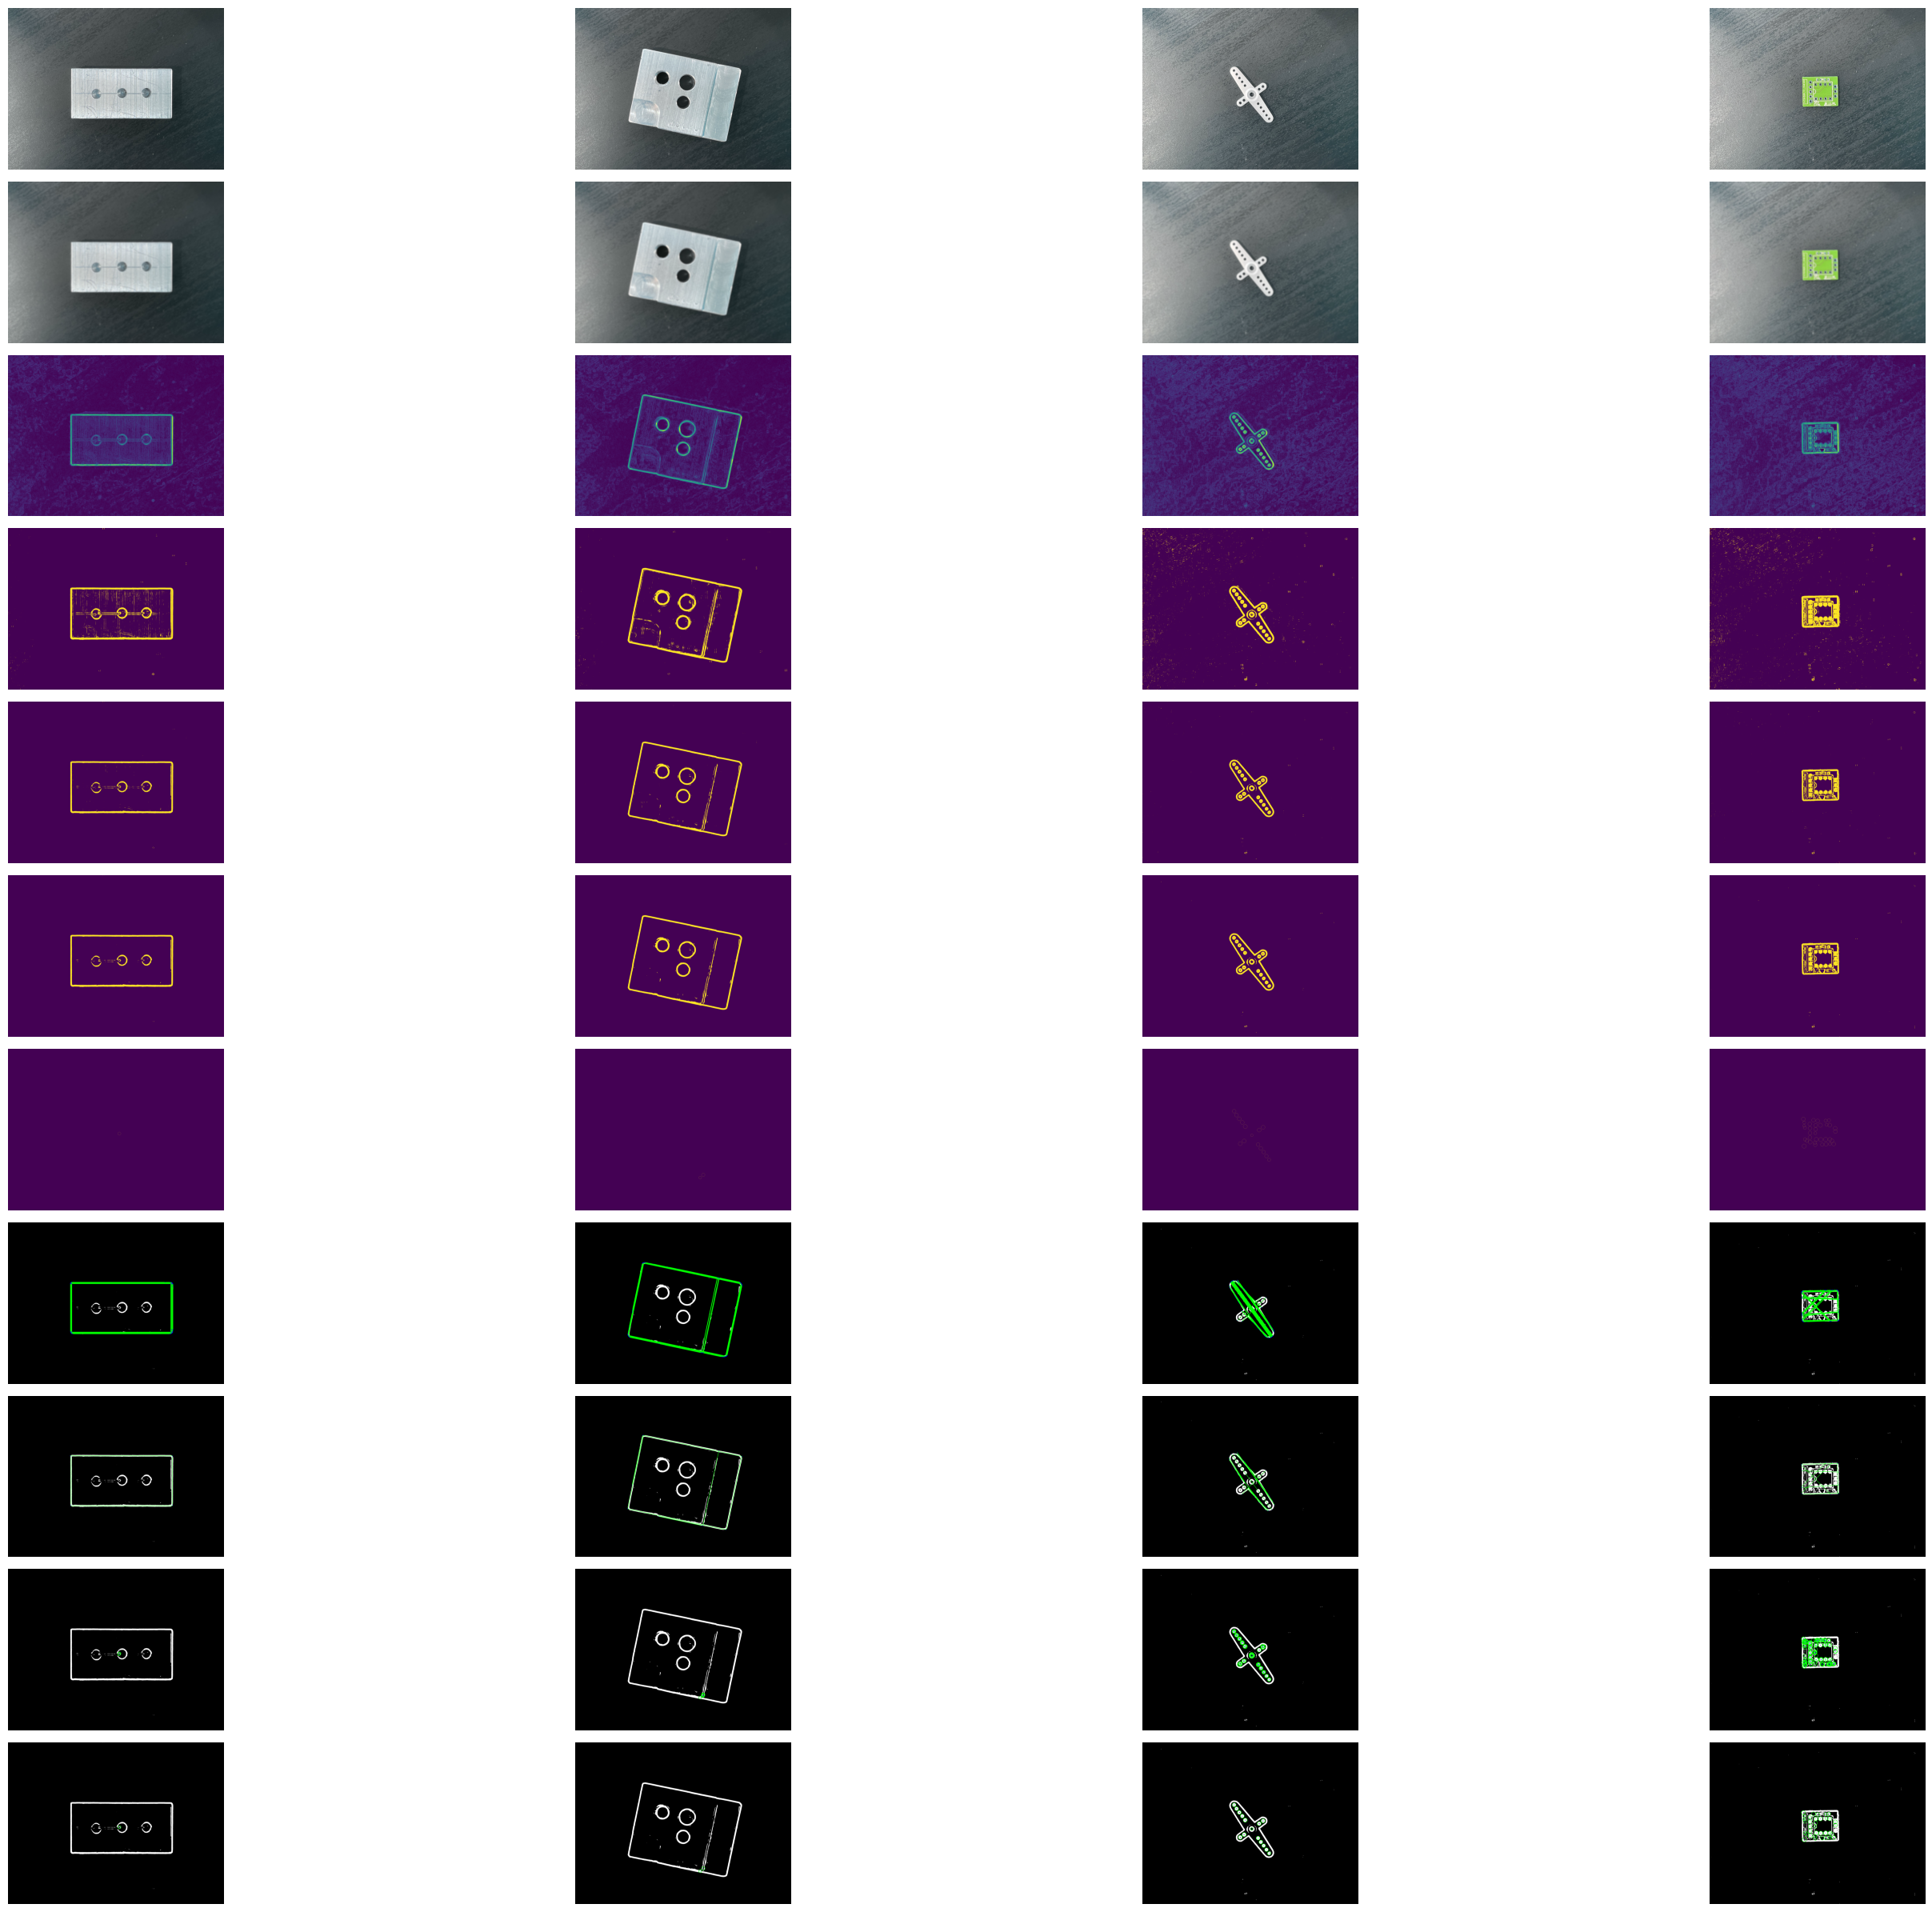

In [10]:
figsize = (32,24)    # physical part images taken from iphone should be of shape 4:3
cols = len(img_results_filtered)     # plot objects along cols
rows = len(img_results_filtered[0])  # plot steps along rows

plt.figure(figsize=figsize)
i = 1
for r in range(rows):
    for obj in img_results_filtered:
        plt.subplot(rows, cols, i)
        rst = obj[r]
        plt.imshow(rst)
        plt.axis('off')
        i += 1
plt.tight_layout()
plt.show()


# 6. Idea 2: Change circle detector to median the midpoints of clusters

Sub point: Get more accurate crop detector (or manually crop for now) to ensure noisy circles can be filtered out by minimum radius checks

# 7. End-to-End Pipeline

**Input:** ROI from a selected image

1. **Preprocessing (`pp.get_edges`)**
   - Compute `edges` and save intermediates for debugging.

2. **Detection**
   - `lines_raw = f_find_lines(edges)`
   - `circles_raw = f_find_circles(edges)`

3. **Filtration**
   - `lines_f = filter_lines(lines_raw)`
   - `circles_f, fake_canvas = filter_circles(edges, circles_raw, H, W)`

4. **Matching (`features.match_points_to_*`)**
   - `edge_points, _ = pp.get_edge_points(roi, edges, return_interm=True)`
   - `line_features = match_points_to_lines(lines_f, edge_points, ...)`
   - `circle_features = match_points_to_circles(circles_f, edge_points, ...)`

5. **Measurement (on feature objects)**
   - For each `line_feature`: `calc_dims()`, `calc_tols()`
   - For each `circle_feature`: `calc_dims()`, `calc_tols()`

6. **Output (visuals)**
   - Use `draw_lines_circles(edges, ...)` for consistent final lines/circles
   - Overlay measurement text on the ROI copy

In [11]:
import os
import math
import numpy as np
import cv2
import matplotlib.pyplot as plt
import main
import preprocessing as pp
import detection
from features import match_points_to_lines, match_points_to_circles, Line, Circle

def draw_lines_circles(img_gray, lines, circles, thickness=5):
    base_n_shapes = cv2.cvtColor(img_gray.copy(), cv2.COLOR_GRAY2RGB)
    if lines:
        for (x1, y1, x2, y2) in lines:
            cv2.line(base_n_shapes, (int(x1), int(y1)), (int(x2), int(y2)), (0, 255, 0), thickness)
        for (x1, y1, x2, y2) in lines:
            cv2.circle(base_n_shapes, (int(x1), int(y1)), 2, (0, 0, 255), thickness)
            cv2.circle(base_n_shapes, (int(x2), int(y2)), 2, (0, 0, 255), thickness)
    if circles:
        for (x, y, r) in circles:
            cv2.circle(base_n_shapes, (int(x), int(y)), int(r), (0, 255, 0), thickness)
            cv2.circle(base_n_shapes, (int(x), int(y)), 2, (0, 0, 255), thickness)
    return base_n_shapes

raw lines: 80
raw circles: 0
filtered lines: 4
filtered circles: 0
[match_points_to_lines] detected_lines: 4, min_length: 50.0
  line ref=(20.0,988.0,1450.0,988.0) len=1430.0 matched=2794
  line ref=(17.0,274.0,1460.0,274.0) len=1443.0 matched=3254
  line ref=(19.0,284.0,20.0,976.0) len=692.0 matched=870
  line ref=(1455.0,284.0,1455.0,973.0) len=689.0 matched=156
[match_points_to_lines] returning features: 4
[match_points_to_circles] detected_circles: 0, min_radius: 20.0
[match_points_to_circles] returning features: 0
line feature objects: 4
circle feature objects: 0


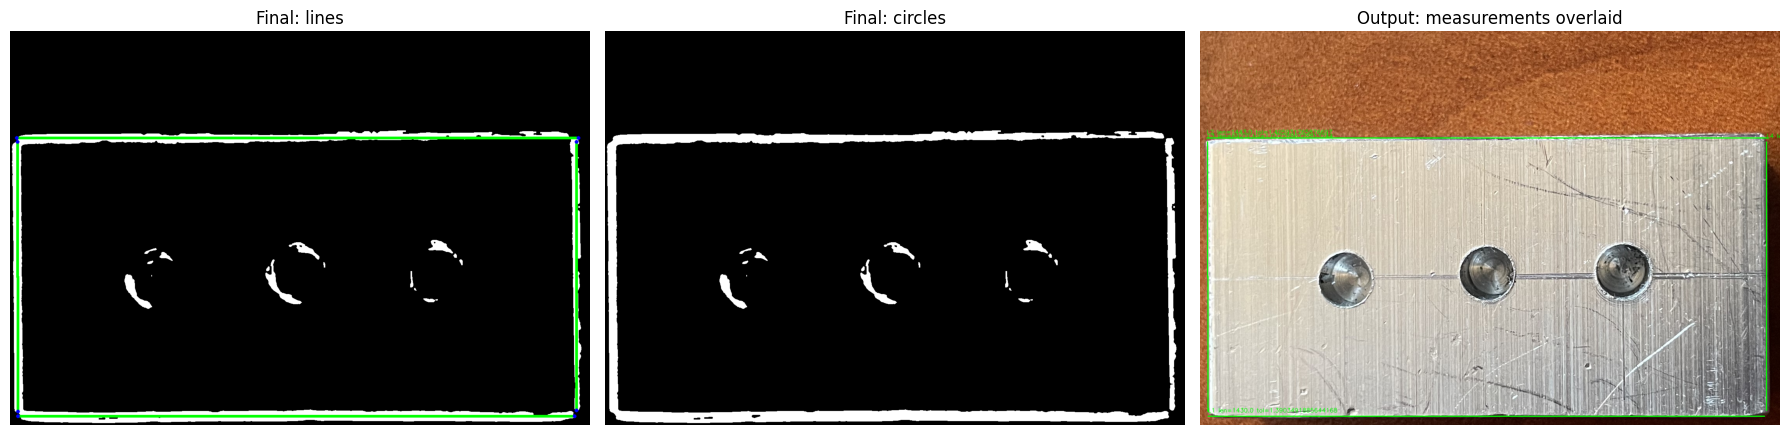

In [12]:

# Load an example image
base_path = os.getcwd()
parts_path = os.path.join(base_path, "data", "physical parts")
img_path = os.path.join(parts_path, "Basic II base part.jpg")
#img_path = os.path.join(parts_path, "mill part 2.jpeg")
img = main.load_img(img_path, greyscale=False)

# Use consistent detection methods as specified
f_find_lines = detection.find_lines_HT
f_find_circles = detection.find_circles_HT

# Use ROI (optional) to reduce clutter
roi = pp.crop_largest_structure(img)[0] if hasattr(pp, "crop_largest_structure") else img
roi_gray = cv2.cvtColor(roi, cv2.COLOR_BGR2GRAY) if roi.ndim == 3 else roi

# 1) Preprocessing: edges
edges, interms = f_get_edges(roi, return_interm=True)

# 2) Detection (using consistent methods)
lines_raw = f_find_lines(edges)
circles_raw = f_find_circles(edges)
# Normalize circles to list for filtration
if circles_raw is None:
    circles_raw = []
elif isinstance(circles_raw, np.ndarray):
    circles_raw = circles_raw.tolist()
print("raw lines:", len(lines_raw) if lines_raw is not None else 0)
print("raw circles:", len(circles_raw))

# 3) Filtering (reuse earlier helpers)
lines_f = filter_lines(lines_raw)
H, W = roi_gray.shape[:2]
circles_f, fake_canvas = filter_circles(edges, circles_raw, H, W)
print("filtered lines:", len(lines_f))
print("filtered circles:", len(circles_f))

# visualization on edges
edges_gray = edges if edges.ndim==2 else cv2.cvtColor(edges, cv2.COLOR_BGR2GRAY)
img_lines_final = draw_lines_circles(edges_gray, lines_f, [], thickness=5)
img_circles_final = draw_lines_circles(edges_gray, [], circles_f, thickness=5)

# 4) Matching edge points to features
edge_points, egpt_interm = pp.get_edge_points(roi, edges, return_interm=True)
line_features = match_points_to_lines(lines_f, edge_points, max_perp_dist=2.0, min_length=50.0)
circle_features = match_points_to_circles(circles_f, edge_points, max_rad_diff=4.0, min_radius=20.0)
print("line feature objects:", len(line_features))
print("circle feature objects:", len(circle_features))

# 5) Measurement: calc_dims, calc_tols on features
for lf in line_features:
    lf.calc_dims()
    lf.calc_tols()
for cf in circle_features:
    cf.calc_dims()
    cf.calc_tols()

# 6) Output: overlay measurements on original image
canvas = roi.copy()
if canvas.ndim == 2:
    canvas_color = cv2.cvtColor(canvas, cv2.COLOR_GRAY2BGR)
else:
    canvas_color = canvas.copy()

# Draw lines + text
for i, lf in enumerate(line_features):
    x0, y0, x1, y1 = map(int, lf.ref)
    cv2.line(canvas_color, (x0, y0), (x1, y1), (0, 255, 0), 2)
    length_attr = getattr(lf, 'length', None)
    straightness_attr = getattr(lf, 'straightness', None)
    length_txt = f"L{i+1} len={(length_attr if length_attr is not None else 0):.1f} tol={straightness_attr}"
    cv2.putText(canvas_color, length_txt, (x0, max(y0-10, 0)), cv2.FONT_HERSHEY_SIMPLEX, 0.5, (0,255,0), 1, cv2.LINE_AA)

# Draw circles + text
for j, cf in enumerate(circle_features):
    xc, yc = map(int, cf.center)
    r = int(cf.radius)
    cv2.circle(canvas_color, (xc, yc), r, (255, 0, 0), 2)
    radial_std_attr = getattr(cf, 'radial_std', None)
    radius_txt = f"C{j+1} r={cf.radius:.1f} std={radial_std_attr}"
    cv2.putText(canvas_color, radius_txt, (xc, max(yc-10, 0)), cv2.FONT_HERSHEY_SIMPLEX, 0.5, (255,0,0), 1, cv2.LINE_AA)

# Show consistent visuals and measurement overlay
plt.figure(figsize=(18,6))
plt.subplot(1,3,1)
plt.imshow(img_lines_final)
plt.title("Final: lines")
plt.axis('off')

plt.subplot(1,3,2)
plt.imshow(img_circles_final)
plt.title("Final: circles")
plt.axis('off')

plt.subplot(1,3,3)
plt.imshow(cv2.cvtColor(canvas_color, cv2.COLOR_BGR2RGB))
plt.title("Output: measurements overlaid")
plt.axis('off')
plt.tight_layout()
plt.show()